In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
dataset_path = '/content/drive/MyDrive/New_dataset_wristGuard/wrist_dataset_new/Wrist/train'

augmenting the images

In [ ]:
import os
from PIL import Image
from torchvision import transforms

data_transforms = transforms.Compose([
    transforms.RandomRotation(40),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
])

def augment_images(image_path, save_dir, num_augmented_images, suffix='aug'):
    img = Image.open(image_path)
    for i in range(num_augmented_images):
        augmented_image = data_transforms(img)
        augmented_image = transforms.ToPILImage()(augmented_image)

        base_name = os.path.splitext(os.path.basename(image_path))[0]
        aug_name = f'{base_name}_{suffix}{i}{os.path.splitext(image_path)[1]}'
        augmented_image.save(os.path.join(save_dir, aug_name))


base_path = '/content/drive/MyDrive/New_dataset_wristGuard/wrist_dataset_new/Wrist/train'

folders = [
    'Complete_Fracture_Bilateral_colles_fracture',
    'Complete_Fracture_Barton_fracture',
    'Complete_Fracture_chauffeur_fracture',
    'Complete_Fracture_BeFunky_fracture',
    'Complete_Fracture_boxer_fracture',
    'Complete_Fracture_colles_fracture',
    'Complete_Fracture_concurrent_ulnar-head_and_colles_fractures',
    'Complete_Fracture_distal_radial_fracture',
    'Complete_Fracture_pseudo_bennett_fracture',
    'Dislocation Fracture_bennett_fracture',
    'Complete_Fracture_smith_fracture',
    'Complete_Fracture_salter-harris-type-iii-fracture',
    'Complete_Fracture_enchondroma-with-pathological-fracture',
    'Complete_Fracture_transverse-distal-radial-fracture',
    'Complete_Fracture_radial_styloid_fracture',
    'Complete_Fracture_galeazzi_fracture',
    'Complete_Fracture_hamate_fracture',
    'Incomplete_Fracture_torus-fracture',
    'Dislocation Fracture_displaced-radial-shaft-fracture-with-radial-head-dislocation',
    'Dislocation Fracture_galeazzi_fracture',
    'Dislocation Fracture_perilunate-dislocation',
    'Incomplete_Fracture_distal-radial-greenstick-fracture',
    'Incomplete_Fracture_distal-quarter-of-radius-fracture',
    'Incomplete_Fracture_distal-radius-torus-fracture',
    'Dislocation Fracture_trans-scaphoid-perilunate-dislocation',
    'Dislocation Fracture_reverse-bennett-fracture-dislocation',
    'Incomplete_Fracture_greenstick-fracture',
    'Incomplete_Fracture_triangular-fibrocartilage-complex-tfcc-tear-with-avulsion-fracture-of-the-ulnar-styloid-process (Frontal)',
    'Incomplete_Fracture_transverse-distal-radial-fracture',
    'Normal_no_fracture'
]


for folder in folders:
    folder_path = os.path.join(base_path, folder)


    if os.path.exists(folder_path):
        images = os.listdir(folder_path)

        num_images = len(images)
        print(f'Folder "{folder}": {num_images} images')


        if num_images < 95:
            num_augmented_images = 95 - num_images
            print(f'Augmenting {num_augmented_images} images for folder "{folder}"')


            for image_name in images:
                image_path = os.path.join(folder_path, image_name)
                augment_images(image_path, folder_path, num_augmented_images, suffix='aug')


        updated_images = os.listdir(folder_path)
        if len(updated_images) > 95:
            print(f"Warning: {folder} contains more than 95 images. Trimming excess images.")

            for image_name in updated_images[95:]:
                os.remove(os.path.join(folder_path, image_name))
            print(f"Folder {folder} now contains exactly 95 images.")
        else:
            print(f"Folder {folder} now contains {len(updated_images)} images (no trimming needed).")
    else:
        print(f"Folder '{folder}' does not exist, skipping...")


Folder "Complete_Fracture_Bilateral_colles_fracture": 95 images
Folder Complete_Fracture_Bilateral_colles_fracture now contains 95 images (no trimming needed).
Folder "Complete_Fracture_Barton_fracture": 95 images
Folder Complete_Fracture_Barton_fracture now contains 95 images (no trimming needed).
Folder "Complete_Fracture_chauffeur_fracture": 95 images
Folder Complete_Fracture_chauffeur_fracture now contains 95 images (no trimming needed).
Folder "Complete_Fracture_BeFunky_fracture": 95 images
Folder Complete_Fracture_BeFunky_fracture now contains 95 images (no trimming needed).
Folder "Complete_Fracture_boxer_fracture": 95 images
Folder Complete_Fracture_boxer_fracture now contains 95 images (no trimming needed).
Folder "Complete_Fracture_colles_fracture": 95 images
Folder Complete_Fracture_colles_fracture now contains 95 images (no trimming needed).
Folder "Complete_Fracture_concurrent_ulnar-head_and_colles_fractures": 95 images
Folder Complete_Fracture_concurrent_ulnar-head_and_co

preprocessing

Found 2310 files belonging to 30 classes.


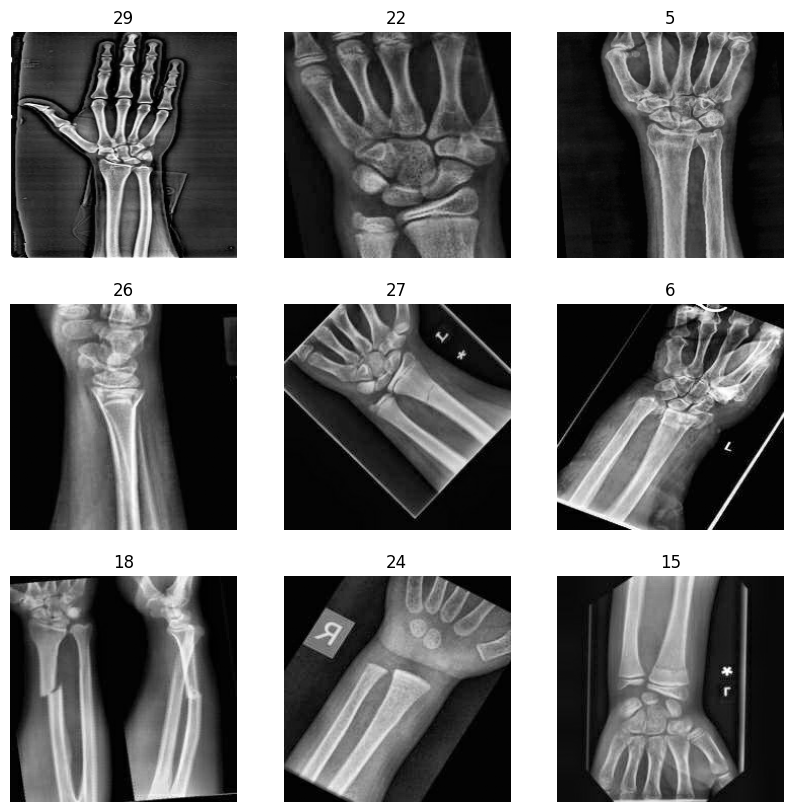

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

def preprocess_image(image, model_type="resnet"):

    image = tf.image.resize(image, (224, 224))

    image = image / 255.0

    return image

def load_and_preprocess_data(dataset_path):

    dataset = image_dataset_from_directory(
        dataset_path,
        image_size=(224, 224),
        batch_size=32,
        label_mode='int',
        shuffle=True,
        seed=42
    )

    dataset = dataset.map(
        lambda image, label: (preprocess_image(image), label),
        num_parallel_calls=tf.data.AUTOTUNE
    )

    return dataset


dataset_path = '/content/drive/MyDrive/New_dataset_wristGuard/wrist_dataset_new/Wrist/train_clahe'
train_dataset = load_and_preprocess_data(dataset_path)

import matplotlib.pyplot as plt
for images, labels in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(labels[i].numpy())
        plt.axis("off")
    plt.show()


Contrast Enhancement Using CLAHE

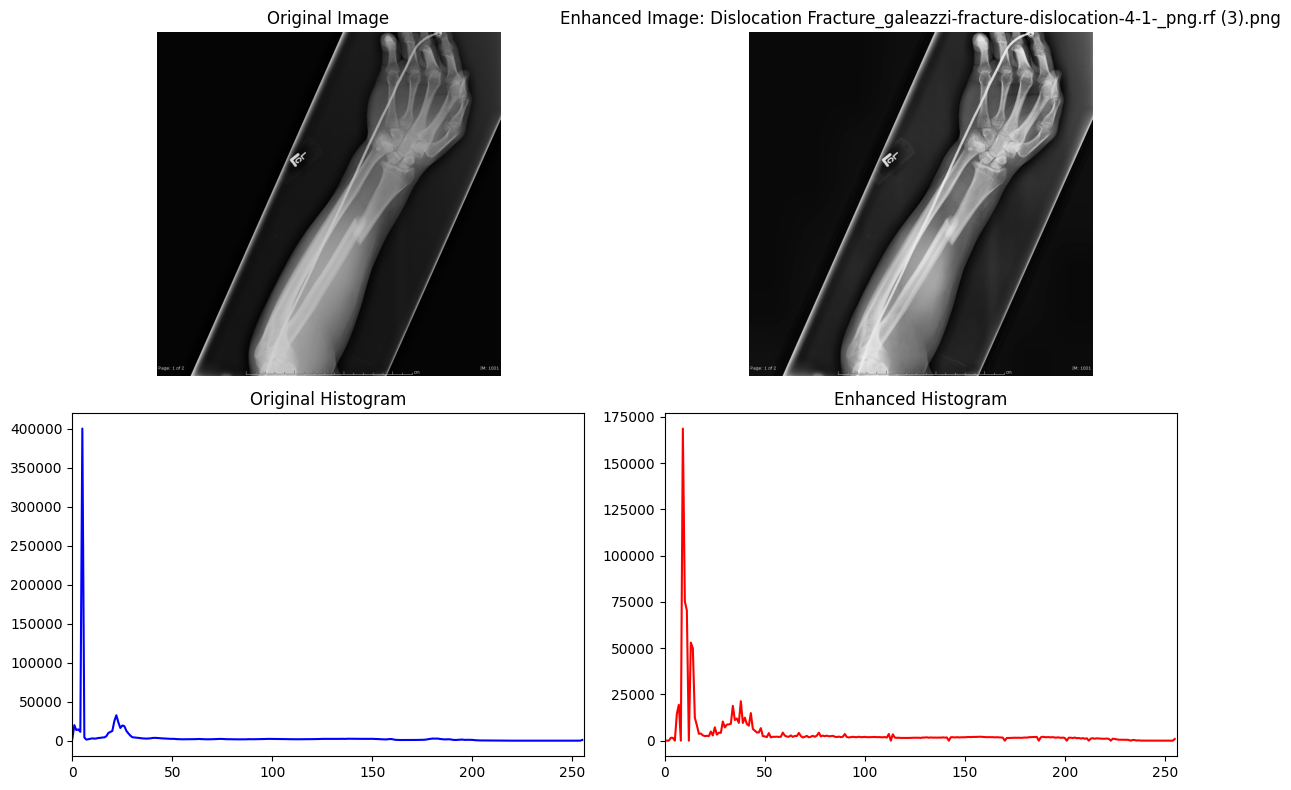

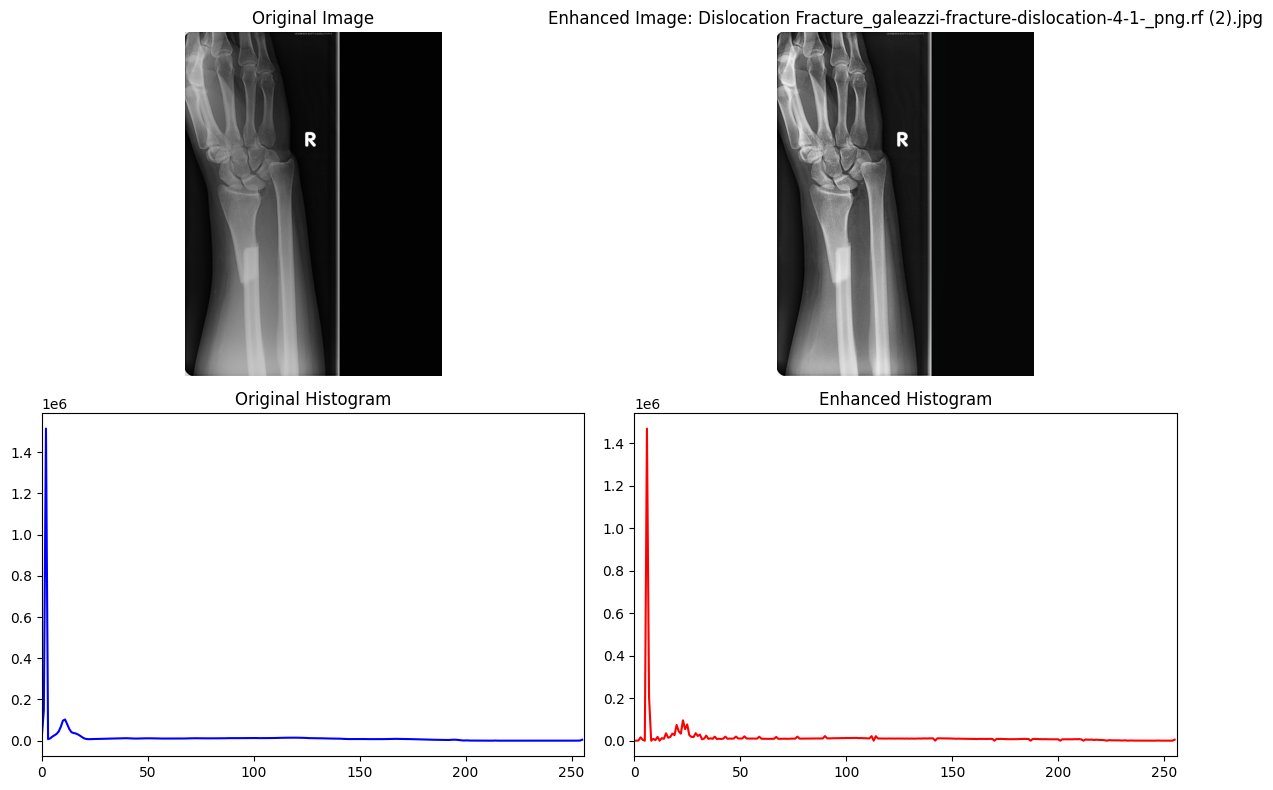

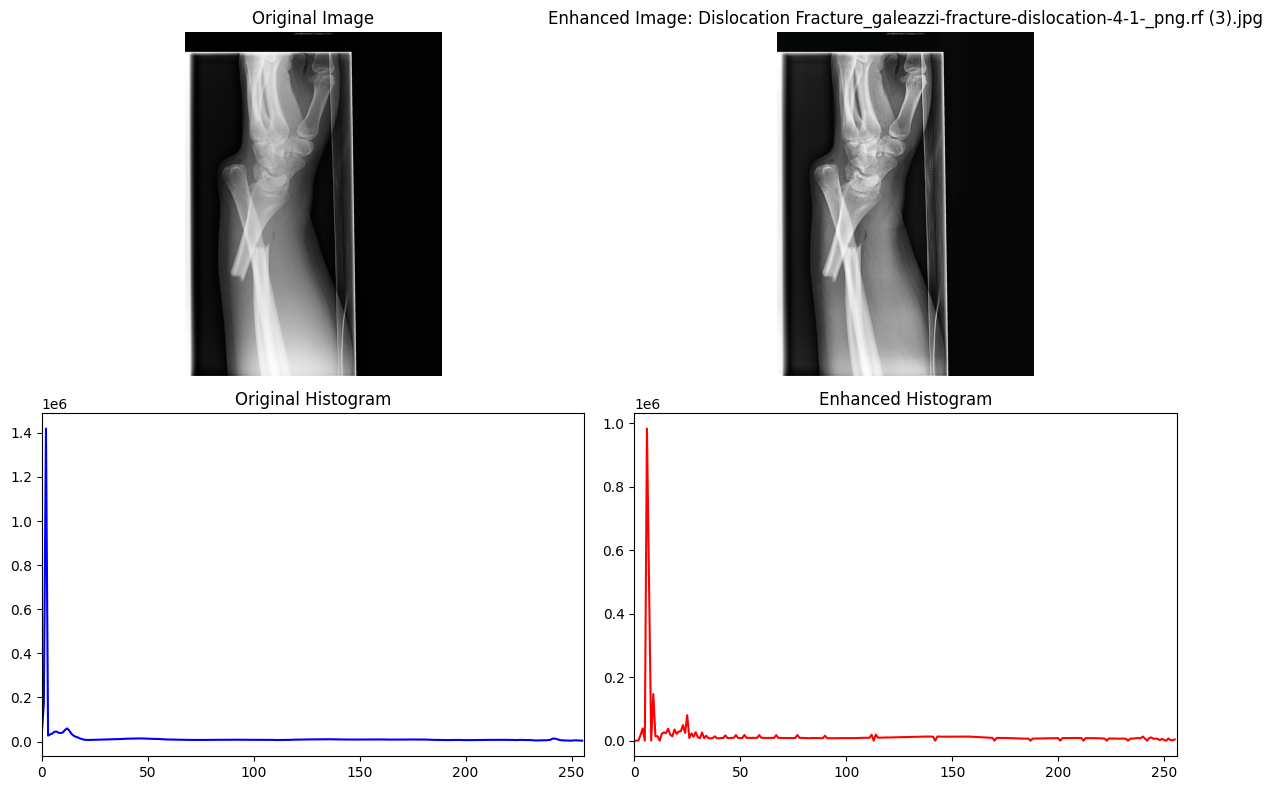

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt


def apply_clahe(image):
    # Convert to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab_image)

    # Apply CLAHE to the L channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_l = clahe.apply(l)

    # Merge the enhanced L channel with A and B channels
    enhanced_lab_image = cv2.merge((enhanced_l, a, b))
    enhanced_image = cv2.cvtColor(enhanced_lab_image, cv2.COLOR_LAB2BGR)

    return enhanced_image


def plot_image_and_histogram(original_image, enhanced_image, title="Image with CLAHE"):
    # Convert images to grayscale for histogram calculation
    original_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    enhanced_gray = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2GRAY)

    # Calculate histograms
    original_hist = cv2.calcHist([original_gray], [0], None, [256], [0, 256])
    enhanced_hist = cv2.calcHist([enhanced_gray], [0], None, [256], [0, 256])

    # Plot images and histograms
    plt.figure(figsize=(12, 8))

    # Original Image
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    # Enhanced Image
    plt.subplot(2, 2, 2)
    plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")

    # Original Histogram
    plt.subplot(2, 2, 3)
    plt.plot(original_hist, color="blue")
    plt.title("Original Histogram")
    plt.xlim([0, 256])

    # Enhanced Histogram
    plt.subplot(2, 2, 4)
    plt.plot(enhanced_hist, color="red")
    plt.title("Enhanced Histogram")
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()


sample_images_dir = '/content/drive/MyDrive/New_dataset_wristGuard/wrist_dataset_new/Wrist/train/Dislocation Fracture_galeazzi_fracture'

num_images_to_process = 3
processed_count = 0


for file_name in os.listdir(sample_images_dir):
    if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):

        image_path = os.path.join(sample_images_dir, file_name)

        original_image = cv2.imread(image_path)

        enhanced_image = apply_clahe(original_image)

        plot_image_and_histogram(original_image, enhanced_image, title=f"Enhanced Image: {file_name}")

        processed_count += 1
        if processed_count >= num_images_to_process:
            break


In [ ]:
# Print the shapes of train_generator and densenet_labels
print(train_generator.samples)
print(len(densenet_labels))

2310
2310


In [ ]:
import os
import glob
import cv2
import numpy as np
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import StackingClassifier
from tensorflow.keras.applications import MobileNet, ResNet50, DenseNet121, InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight


SIZE = 224
train_dir = "/content/drive/MyDrive/New_dataset_wristGuard/wrist_dataset_new/Wrist/train"
test_dir = "/content/drive/MyDrive/New_dataset_wristGuard/wrist_dataset_new/Wrist/test"
specific_labels = [
    'Normal_no_fracture',
    'Complete_Fracture_Bilateral_colles_fracture',
    'Complete_Fracture_Barton_fracture',
    'Complete_Fracture_chauffeur_fracture',
    'Complete_Fracture_BeFunky_fracture',
    'Complete_Fracture_boxer_fracture',
    'Complete_Fracture_colles_fracture',
    'Complete_Fracture_concurrent_ulnar-head_and_colles_fractures',
    'Complete_Fracture_distal_radial_fracture',
    'Complete_Fracture_pseudo_bennett_fracture',
    'Dislocation Fracture_bennett_fracture',
    'Complete_Fracture_smith_fracture',
    'Complete_Fracture_salter-harris-type-iii-fracture',
    'Complete_Fracture_enchondroma-with-pathological-fracture',
    'Complete_Fracture_transverse-distal-radial-fracture',
    'Complete_Fracture_radial_styloid_fracture',
    'Complete_Fracture_galeazzi_fracture',
    'Complete_Fracture_hamate_fracture',
    'Incomplete_Fracture_torus-fracture',
    'Dislocation Fracture_displaced-radial-shaft-fracture-with-radial-head-dislocation',
    'Dislocation Fracture_galeazzi_fracture',
    'Dislocation Fracture_perilunate-dislocation',
    'Incomplete_Fracture_distal-radial-greenstick-fracture',
    'Incomplete_Fracture_distal-quarter-of-radius-fracture',
    'Incomplete_Fracture_distal-radius-torus-fracture',
    'Dislocation Fracture_trans-scaphoid-perilunate-dislocation',
    'Dislocation Fracture_reverse-bennett-fracture-dislocation',
    'Incomplete_Fracture_greenstick-fracture',
    'Incomplete_Fracture_triangular-fibrocartilage-complex-tfcc-tear-with-avulsion-fracture-of-the-ulnar-styloid-process (Frontal)',
    'Incomplete_Fracture_transverse-distal-radial-fracture'
]

def load_images_and_labels(base_dir, categories, size):
    images = []
    labels = []

    for category in categories:
        folder_path = os.path.join(base_dir, category)
        img_files = glob.glob(os.path.join(folder_path, "*.*"))
        print(f"Loading images from {folder_path}... Found {len(img_files)} images.")

        for img_path in img_files:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"Warning: Could not read image {img_path}")
                continue

            # Histogram Equalization
            img = cv2.equalizeHist(img)

            img = cv2.resize(img, (size, size))
            img = img / 255.0
            images.append(img)
            labels.append(category)

    return np.array(images), np.array(labels)

print("Step 1: Loading images...")
X, y = load_images_and_labels(train_dir, specific_labels, SIZE)


print("Step 2: Encoding labels...")
label_encoder = preprocessing.LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("\nLabel Encoding:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {i}")

class_weights = compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weight_dict = dict(zip(np.unique(y_encoded), class_weights))
print(f"Class weights: {class_weight_dict}")


print("Step 4: Splitting dataset...")
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


y_train_encoded = to_categorical(y_train, num_classes=len(specific_labels))
y_val_encoded = to_categorical(y_val, num_classes=len(specific_labels))

print("Step 6: Loading models for feature extraction...")
base_models = [
    MobileNet(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3)),
    ResNet50(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3)),
    DenseNet121(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3)),
    InceptionV3(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))
]


def extract_features(X, models, size):
    features = []
    for img in X:
        img_rgb = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_GRAY2RGB)
        img_rgb = cv2.resize(img_rgb, (size, size))
        img_rgb = np.expand_dims(img_rgb, axis=0)
        model_features = []
        for model in models:
            feature = model.predict(img_rgb).flatten()
            model_features.append(feature)
        features.append(np.concatenate(model_features))
    return np.array(features)

print("Step 7: Extracting features...")
X_train_features = extract_features(X_train, base_models, SIZE)
X_val_features = extract_features(X_val, base_models, SIZE)


if X_train_features.shape[0] != X_val_features.shape[0]:
    min_len = min(X_train_features.shape[0], X_val_features.shape[0])
    X_train_features = X_train_features[:min_len]
    X_val_features = X_val_features[:min_len]
    y_train_encoded = y_train_encoded[:min_len]
    y_val_encoded = y_val_encoded[:min_len]
    print(f"Mismatch detected: Excess features removed. New feature size: {min_len}")

print("Step 9: Training StackingClassifier...")


base_classifiers = [
    ('mobile_net', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ('resnet50', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ('densenet', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ('inception', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
]


stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
)

stacking_classifier.fit(X_train_features, y_train_encoded)

print("Step 10: Evaluating the model...")
y_pred = stacking_classifier.predict(X_val_features)
print("\nClassification Report:")
print(classification_report(y_val_encoded, y_pred, target_names=label_encoder.classes_))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_val_encoded.argmax(axis=1), y_pred)
plt.figure(figsize=(10, 7))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(len(label_encoder.classes_)), label_encoder.classes_, rotation=90)
plt.yticks(np.arange(len(label_encoder.classes_)), label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



Step 1: Loading images...
Loading images from /content/drive/MyDrive/New_dataset_wristGuard/wrist_dataset_new/Wrist/train/Normal_no_fracture... Found 77 images.
Loading images from /content/drive/MyDrive/New_dataset_wristGuard/wrist_dataset_new/Wrist/train/Complete_Fracture_Bilateral_colles_fracture... Found 77 images.
Loading images from /content/drive/MyDrive/New_dataset_wristGuard/wrist_dataset_new/Wrist/train/Complete_Fracture_Barton_fracture... Found 77 images.
Loading images from /content/drive/MyDrive/New_dataset_wristGuard/wrist_dataset_new/Wrist/train/Complete_Fracture_chauffeur_fracture... Found 77 images.
Loading images from /content/drive/MyDrive/New_dataset_wristGuard/wrist_dataset_new/Wrist/train/Complete_Fracture_BeFunky_fracture... Found 77 images.
Loading images from /content/drive/MyDrive/New_dataset_wristGuard/wrist_dataset_new/Wrist/train/Complete_Fracture_boxer_fracture... Found 77 images.
Loading images from /content/drive/MyDrive/New_dataset_wristGuard/wrist_data

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:47:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Step 9: Evaluating the model...
Validation Accuracy: 4.98%


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
import xgboost as xgb
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Model
import joblib
import random

print("Step 1: Loading and preprocessing data...")


def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                img_path = os.path.join(label_folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (224, 224))
                    images.append(img)
                    labels.append(label)
    return np.array(images), np.array(labels)

# Load the dataset
train_folder = '/content/drive/MyDrive/New_dataset_wristGuard/wrist_dataset_new/Wrist/train_clahe'
X, y = load_images_from_folder(train_folder)


X_normalized = preprocess_input(X)


mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


model = Model(inputs=mobilenet_model.input, outputs=mobilenet_model.output)


def extract_features(X):
    features = model.predict(X)
    features_flattened = features.reshape(features.shape[0], -1)
    return features_flattened

X_features = extract_features(X_normalized)


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_encoded, test_size=0.2, random_state=42)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

sample_weights = np.array([class_weight_dict[label] for label in y_train])

print("Step 9: Training XGBoost classifier...")

classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', scale_pos_weight=class_weights[1])


classifier.fit(X_train, y_train, sample_weight=sample_weights)


print("Step 10: Evaluating the model...")

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

model_path = '/content/drive/MyDrive/xgboost_model_with_mobilenet_features.joblib'
joblib.dump(classifier, model_path)

label_encoder_path = '/content/drive/MyDrive/label_encoder_with_mobilenet_features.joblib'
joblib.dump(label_encoder, label_encoder_path)

def predict_image(img_path, model, label_encoder, mobilenet_model):
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (224, 224))
    img_normalized = preprocess_input(np.expand_dims(img_resized, axis=0))

    features = mobilenet_model.predict(img_normalized)
    features_flattened = features.reshape(features.shape[0], -1)

    prediction = model.predict(features_flattened)
    predicted_label = label_encoder.inverse_transform(prediction)

    return predicted_label[0]

def predict_random_images(test_folder, model, label_encoder, mobilenet_model, num_images=3):
    all_images = []
    for label in os.listdir(test_folder):
        label_folder = os.path.join(test_folder, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                img_path = os.path.join(label_folder, filename)
                all_images.append(img_path)

    random_images = random.sample(all_images, num_images)

    print("\nStep 14: Predicting random images...")
    for img_path in random_images:
        predicted_class = predict_image(img_path, model, label_encoder, mobilenet_model)
        print(f"Prediction for {img_path}: {predicted_class}")

test_folder = '/content/drive/MyDrive/New_dataset_wristGuard/wrist_dataset_new/Wrist/test_clahe'

predict_random_images(test_folder, classifier, label_encoder, mobilenet_model)


Step 1: Loading and preprocessing data...
73/73 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step
Step 9: Training XGBoost classifier...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:56:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Step 10: Evaluating the model...
                                                                                                                               precision    recall  f1-score   support

                                                                                            Complete_Fracture_Barton_fracture       1.00      1.00      1.00        11
                                                                                           Complete_Fracture_BeFunky_fracture       0.84      0.80      0.82        20
                                                                                  Complete_Fracture_Bilateral_colles_fracture       1.00      1.00      1.00        15
                                                                                             Complete_Fracture_boxer_fracture       0.71      0.83      0.77        12
                                                                                         Complete_Fracture_chauffeur_fracture      

Step 10: Evaluating the model...
                                                                                                                               precision    recall  f1-score   support

                                                                                            Complete_Fracture_Barton_fracture       1.00      1.00      1.00        11
                                                                                           Complete_Fracture_BeFunky_fracture       0.84      0.80      0.82        20
                                                                                  Complete_Fracture_Bilateral_colles_fracture       1.00      1.00      1.00        15
                                                                                             Complete_Fracture_boxer_fracture       0.71      0.83      0.77        12
                                                                                         Complete_Fracture_chauffeur_fracture      

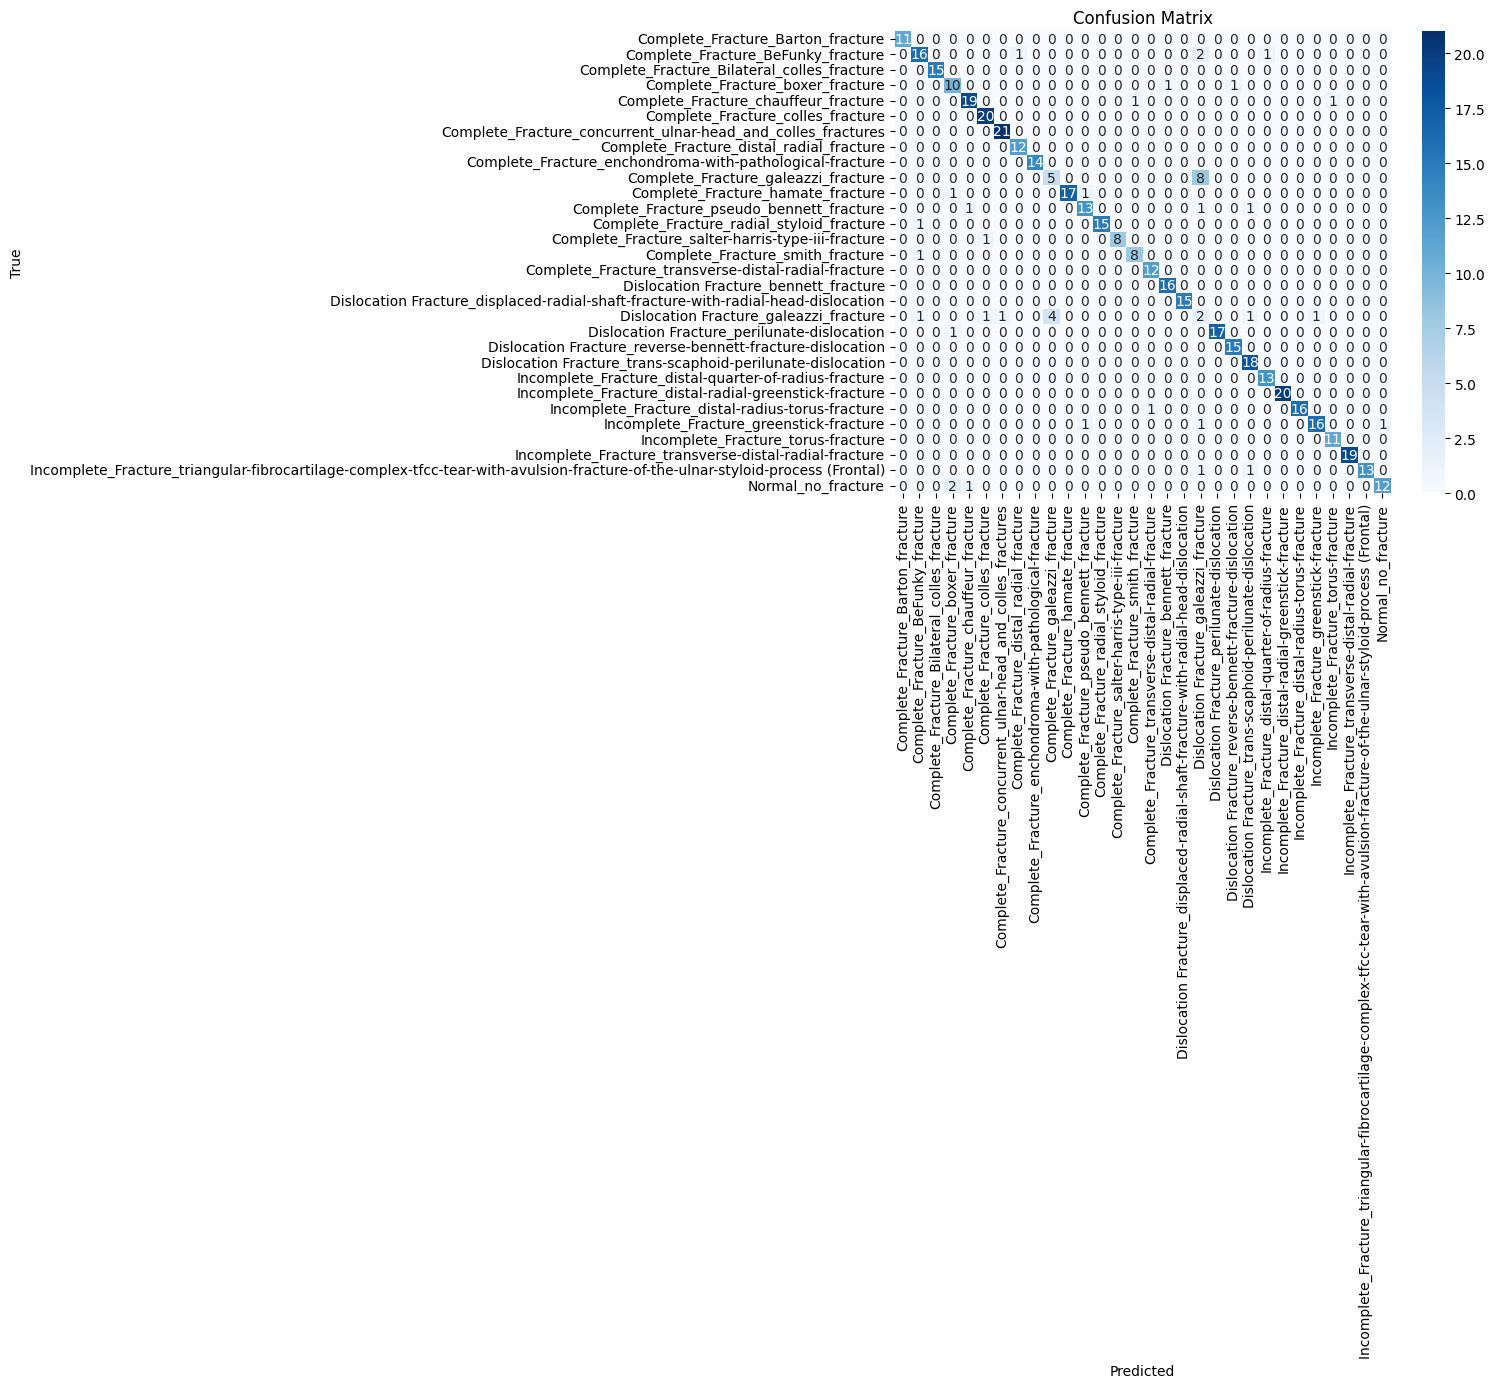

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

print("Step 10: Evaluating the model...")

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Step 10: Evaluating the model...


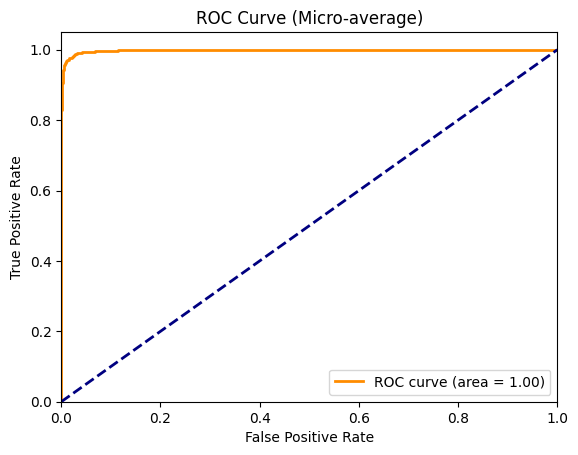

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

print("Step 10: Evaluating the model...")
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color="darkorange", lw=lw, label="ROC curve (area = %0.2f)" % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Micro-average)")
plt.legend(loc="lower right")
plt.show()


<ipython-input-104-be62c52ae2a8>:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


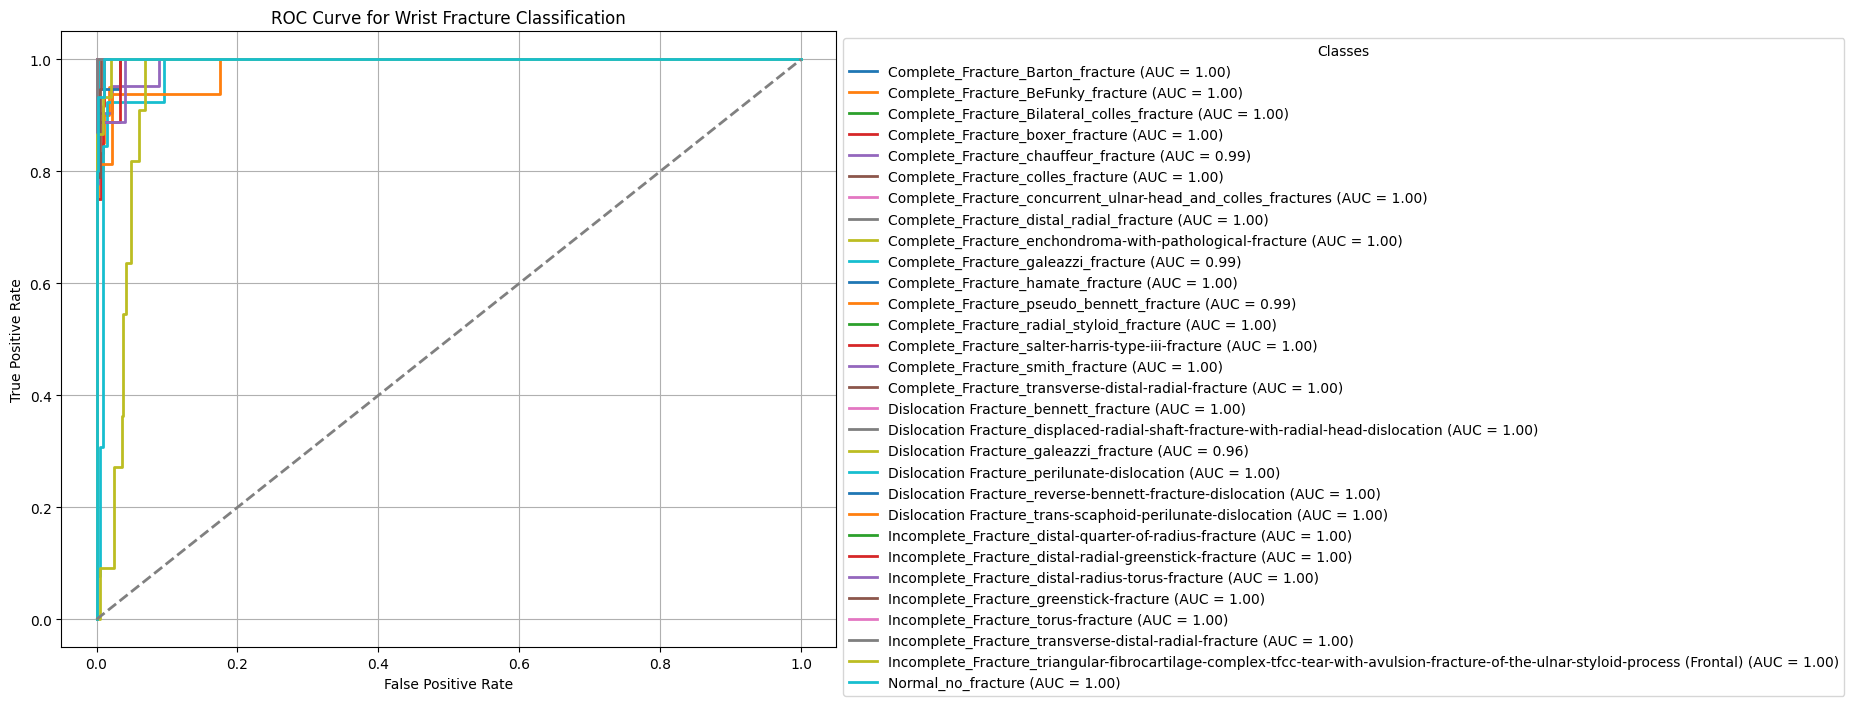

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

y_pred_probabilities = classifier.predict_proba(X_test)

y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probabilities[:, i])

plt.figure(figsize=(10, 8))


for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')


plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Wrist Fracture Classification')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Classes")

plt.grid(True)
plt.tight_layout()

plt.show()


<ipython-input-105-afccbe6b9a47>:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


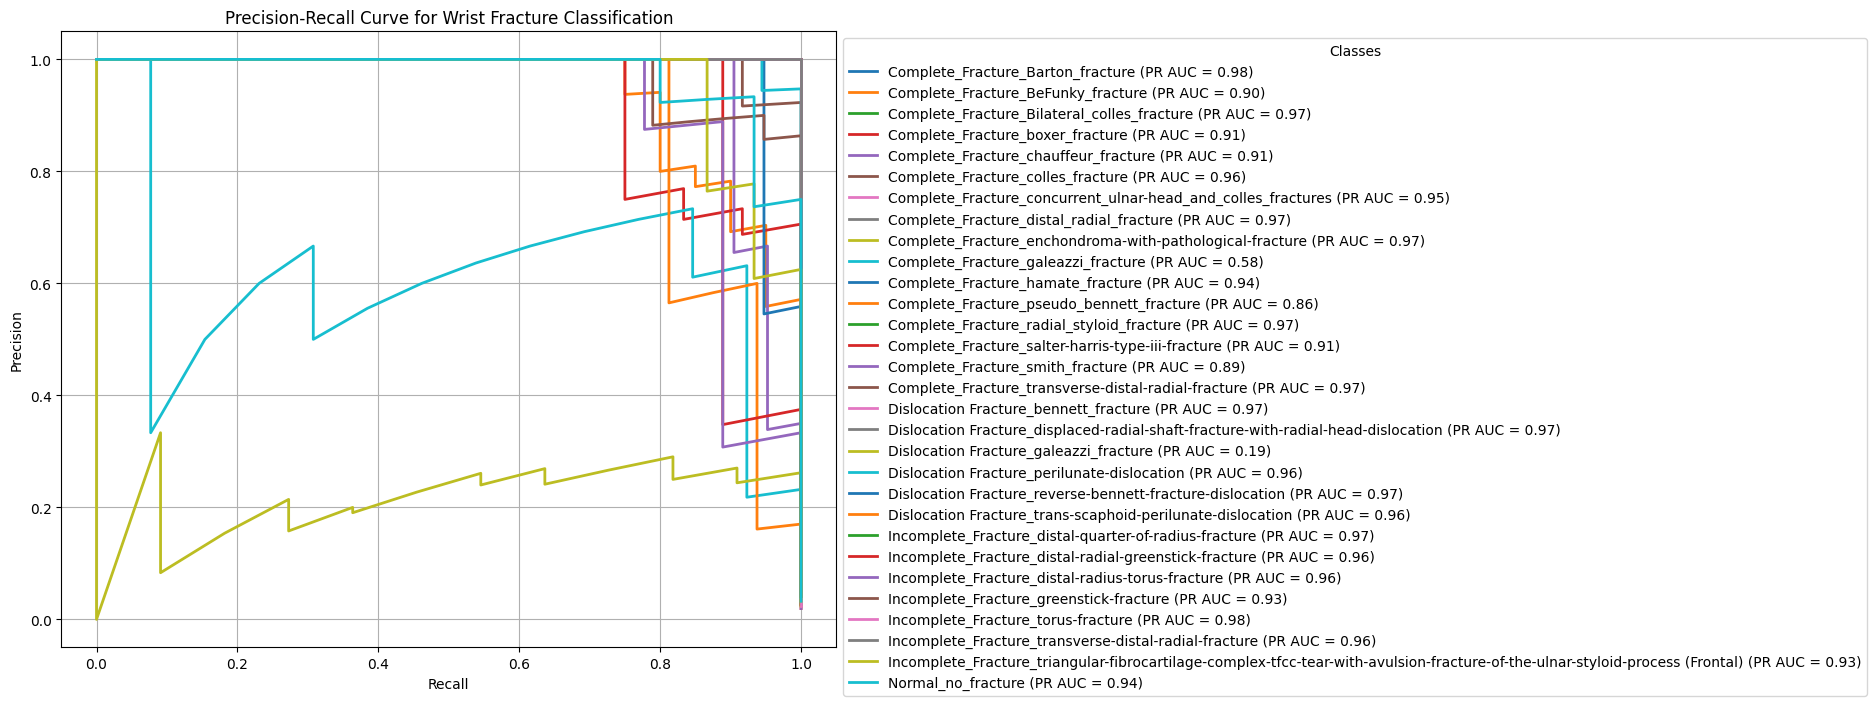

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
import numpy as np

y_pred_probabilities = classifier.predict_proba(X_test)

y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

precision = dict()
recall = dict()
pr_auc = dict()

n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_pred_probabilities[:, i])
    pr_auc[i] = np.trapz(recall[i], precision[i])

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'{label_encoder.classes_[i]} (PR AUC = {pr_auc[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Wrist Fracture Classification')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Classes")

plt.grid(True)
plt.tight_layout()

plt.show()


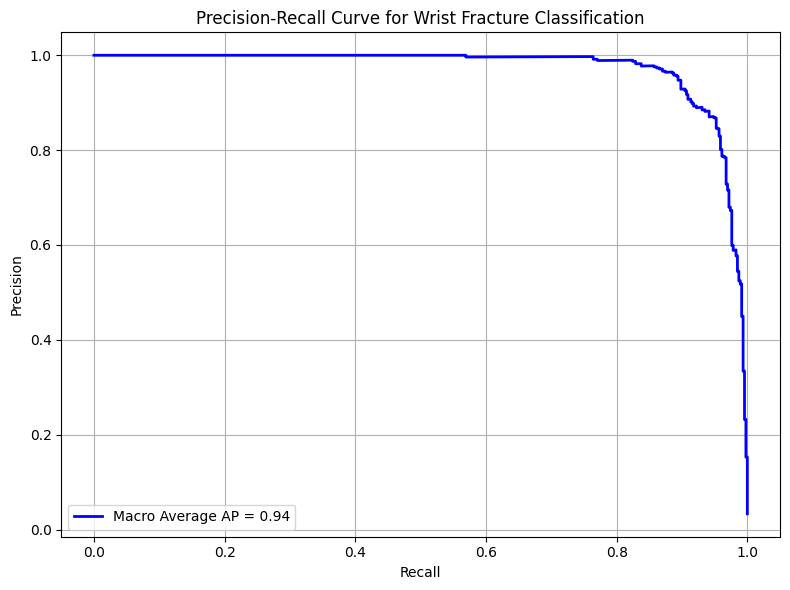

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import numpy as np

y_pred_probabilities = classifier.predict_proba(X_test)

y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

precision, recall, _ = precision_recall_curve(y_test_binarized.ravel(), y_pred_probabilities.ravel())
average_precision = average_precision_score(y_test_binarized, y_pred_probabilities, average='macro')

plt.figure(figsize=(8, 6))

plt.plot(recall, precision, color='b', lw=2, label=f'Macro Average AP = {average_precision:.2f}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Wrist Fracture Classification')

plt.grid(True)
plt.legend(loc='lower left')
plt.tight_layout()

plt.show()



Step 12: Predicting new images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


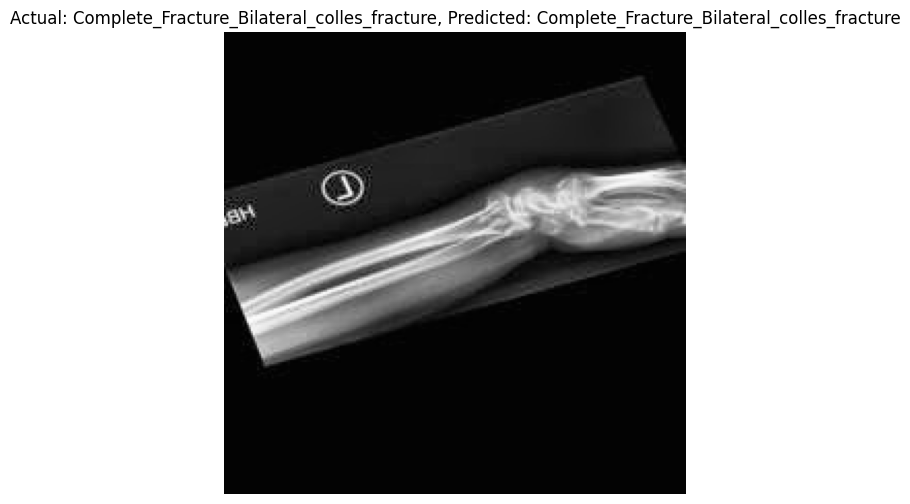

Actual: Complete_Fracture_Bilateral_colles_fracture, Predicted: Complete_Fracture_Bilateral_colles_fracture
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


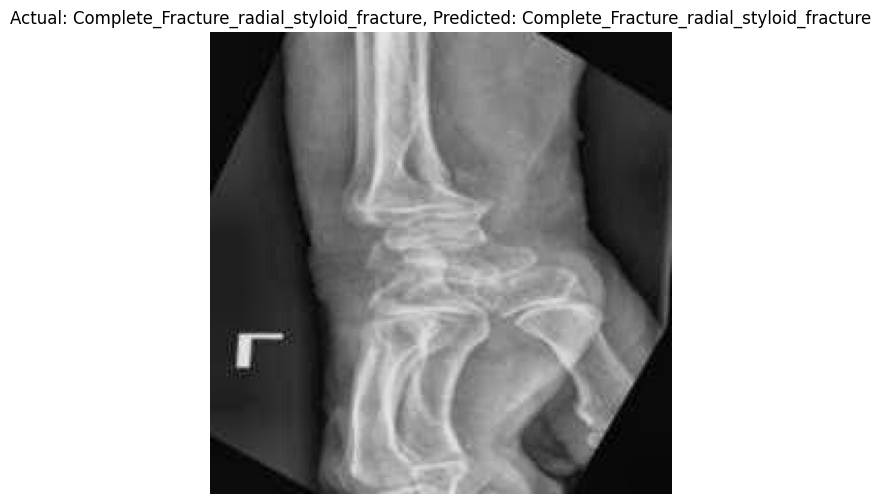

Actual: Complete_Fracture_radial_styloid_fracture, Predicted: Complete_Fracture_radial_styloid_fracture
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


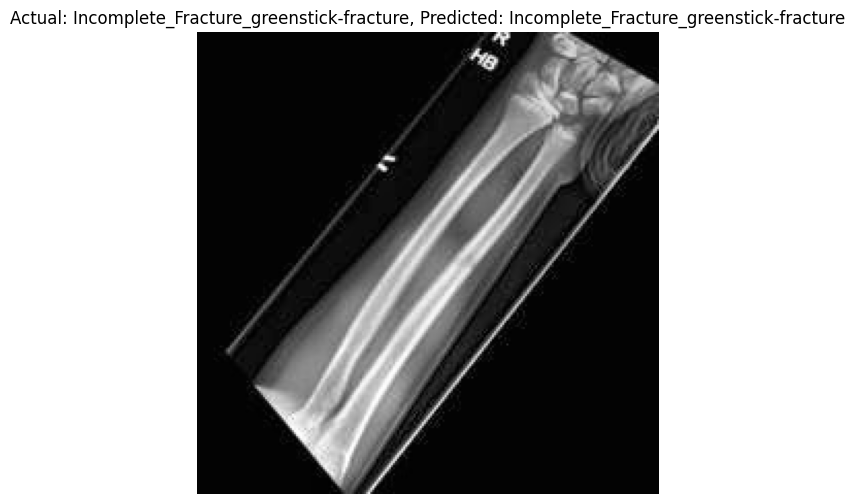

Actual: Incomplete_Fracture_greenstick-fracture, Predicted: Incomplete_Fracture_greenstick-fracture


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_image(img_path, model, label_encoder, mobilenet_model, actual_label=None):
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (224, 224))
    img_normalized = preprocess_input(np.expand_dims(img_resized, axis=0))

    features = mobilenet_model.predict(img_normalized)
    features_flattened = features.reshape(features.shape[0], -1)

    prediction = model.predict(features_flattened)
    predicted_label = label_encoder.inverse_transform(prediction)


    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label[0]}")
    plt.axis('off')
    plt.show()

    return predicted_label[0]


test_images = [
    '/content/drive/MyDrive/New_dataset_wristGuard/wrist_dataset_new/Wrist/test_clahe/Complete_Fracture_Bilateral_colles_fracture/Complete_Fracture_bilateral-colles-fractures_aug0.jpg',  # Update with actual test image paths
    '/content/drive/MyDrive/New_dataset_wristGuard/wrist_dataset_new/Wrist/test_clahe/Complete_Fracture_radial_styloid_fracture/Complete_Fracture_radial-styloid-fracture-3_png.rf (2)_aug67.jpg',
    '/content/drive/MyDrive/New_dataset_wristGuard/wrist_dataset_new/Wrist/test_clahe/Incomplete_Fracture_greenstick-fracture/Incomlplete_Fracture_greenstick-fracture-with-radial-bowing-ulna (1)_aug24.jpg'
]


actual_labels = [
    'Complete_Fracture_Bilateral_colles_fracture',
    'Complete_Fracture_radial_styloid_fracture',
    'Incomplete_Fracture_greenstick-fracture'
]

print("\nStep 12: Predicting new images...")
for img_path, actual_label in zip(test_images, actual_labels):
    predicted_class = predict_image(img_path, classifier, label_encoder, mobilenet_model, actual_label)
    print(f"Actual: {actual_label}, Predicted: {predicted_class}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)

    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_array /= 255.0

    img_tensor = tf.convert_to_tensor(img_array)

    return img_tensor

def predict_with_heatmap(img_path, classifier, label_encoder, mobilenet_model, alpha=0.5):
    img_tensor = preprocess_image(img_path)

    predictions = mobilenet_model.predict(img_tensor)

img_path = '/content/drive/MyDrive/New_dataset_wristGuard/wrist_dataset_new/Wrist/test_clahe/Complete_Fracture_Barton_fracture/Complete_Fracture_barton-fracture_2_aug0.PNG'
predict_with_heatmap(img_path, classifier, label_encoder, mobilenet_model, alpha=0.5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


heatmap

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Loading image: /content/drive/MyDrive/New_dataset_wristGuard/wrist_dataset_new/Wrist/test_clahe/Complete_Fracture_pseudo_bennett_fracture/Complete_Fracture_pseudo-bennett-fracture-3 (1)_aug77.png


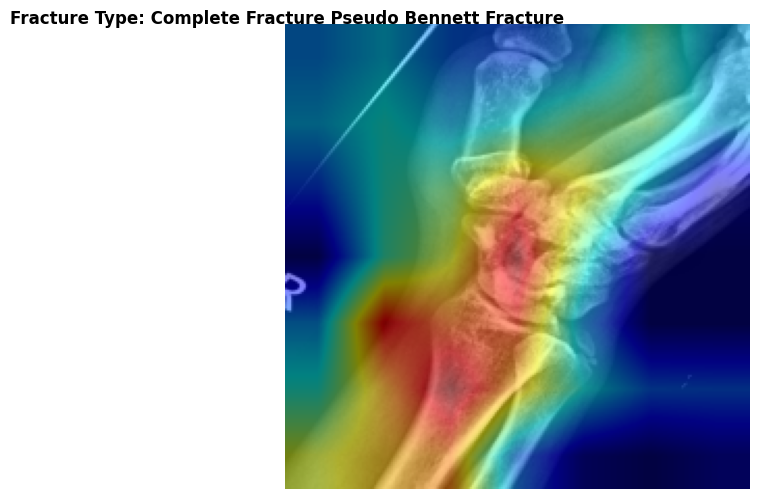

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet

def generate_grad_cam_heatmap(model, img_path, alpha=0.5):
    print(f"Loading image: {img_path}")
    img = cv2.imread(img_path)

    if img is None:
        print(f"Error: The image at {img_path} could not be loaded.")
        return

    img_resized = cv2.resize(img, (224, 224))
    img_normalized = preprocess_input(np.expand_dims(img_resized, axis=0))

    last_conv_layer_name = 'conv_dw_13'

    grad_model = Model(inputs=model.input, outputs=[model.get_layer(last_conv_layer_name).output, model.output])

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_normalized)
        class_idx = tf.argmax(preds[0])
        class_output = preds[:, class_idx]

    grads = tape.gradient(class_output, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = tf.reduce_sum(tf.multiply(last_conv_layer_output, pooled_grads), axis=-1)

    heatmap = np.maximum(heatmap, 0)
    heatmap = heatmap / np.max(heatmap)

    heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    heatmap_colored = cv2.applyColorMap((heatmap_resized * 255).astype(np.uint8), cv2.COLORMAP_JET)
    heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    overlay_img = cv2.addWeighted(img_rgb, 1 - alpha, heatmap_colored, alpha, 0)

    folder_name = os.path.basename(os.path.dirname(img_path))
    fracture_label = folder_name.replace('_', ' ').title()

    fig, ax = plt.subplots(figsize=(6, 8))
    fig.subplots_adjust(top=0.9)

    ax.text(0.5, 1.05, f"Fracture Type: {fracture_label}", ha='center', va='bottom', fontsize=12, fontweight='bold')

    ax.imshow(overlay_img)
    ax.axis('off')
    plt.show()

img_path = '/content/drive/MyDrive/New_dataset_wristGuard/wrist_dataset_new/Wrist/test_clahe/Complete_Fracture_pseudo_bennett_fracture/Complete_Fracture_pseudo-bennett-fracture-3 (1)_aug77.png'
model = MobileNet(weights='imagenet', include_top=True, input_shape=(224, 224, 3))  # Example model
generate_grad_cam_heatmap(model, img_path)


In [ ]:
import joblib

model_path = '/content/drive/MyDrive/xgboost_model_with_mobilenet_features.joblib'
label_encoder_path = '/content/drive/MyDrive/label_encoder_with_mobilenet_features.joblib'

# Load the XGBoost classifier
classifier = joblib.load(model_path)


label_encoder = joblib.load(label_encoder_path)

print("Model and Label Encoder loaded successfully!")


Model and Label Encoder loaded successfully!


In [ ]:
import joblib
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score
from tensorflow.keras.applications.mobilenet import preprocess_input
import cv2
import os

model_path = '/content/drive/MyDrive/xgboost_model_with_mobilenet_features.joblib'
label_encoder_path = '/content/drive/MyDrive/label_encoder_with_mobilenet_features.joblib'

classifier = joblib.load(model_path)

label_encoder = joblib.load(label_encoder_path)

print("Model and Label Encoder loaded successfully!")

def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                img_path = os.path.join(label_folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (224, 224))
                    images.append(img)
                    labels.append(label)
    return np.array(images), np.array(labels)


test_folder = '/content/drive/MyDrive/New_dataset_wristGuard/wrist_dataset_new/Wrist/test_clahe'
X, y = load_images_from_folder(test_folder)

X_normalized = preprocess_input(X)

from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model

mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=mobilenet_model.input, outputs=mobilenet_model.output)

def extract_features(X):
    features = model.predict(X)
    return features.reshape(features.shape[0], -1)

X_features = extract_features(X_normalized)

y_encoded = label_encoder.transform(y)

y_pred = classifier.predict(X_features)

accuracy = accuracy_score(y_encoded, y_pred)
precision = precision_score(y_encoded, y_pred, average='weighted')
recall = recall_score(y_encoded, y_pred, average='weighted')
f1 = f1_score(y_encoded, y_pred, average='weighted')

y_pred_prob = classifier.predict_proba(X_features)
mAP = average_precision_score(y_encoded, y_pred_prob, average='macro', multi_class='ovr')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Average Precision (mAP): {mAP:.4f}")


Model and Label Encoder loaded successfully!
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step
Accuracy: 0.9000
Precision: 0.9072
Recall: 0.9000
F1 Score: 0.9007


In [ ]:
import joblib
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score
from tensorflow.keras.applications.mobilenet import preprocess_input
import cv2
import os
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb


model_path = '/content/drive/MyDrive/xgboost_model_with_mobilenet_features.joblib'
label_encoder_path = '/content/drive/MyDrive/label_encoder_with_mobilenet_features.joblib'

classifier = joblib.load(model_path)

label_encoder = joblib.load(label_encoder_path)

print("Model and Label Encoder loaded successfully!")


def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                img_path = os.path.join(label_folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (224, 224))
                    images.append(img)
                    labels.append(label)
    return np.array(images), np.array(labels)

test_folder = '/content/drive/MyDrive/New_dataset_wristGuard/wrist_dataset_new/Wrist/test_clahe'
X, y = load_images_from_folder(test_folder)

X_normalized = preprocess_input(X)

from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model

mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=mobilenet_model.input, outputs=mobilenet_model.output)

def extract_features(X):
    features = model.predict(X)
    return features.reshape(features.shape[0], -1)

X_features = extract_features(X_normalized)

y_encoded = label_encoder.transform(y)

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 1.5, 2, 3]
}

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), random_state=42)
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_features, y_encoded)

best_classifier = random_search.best_estimator_

y_pred = best_classifier.predict(X_features)


accuracy = accuracy_score(y_encoded, y_pred)
precision = precision_score(y_encoded, y_pred, average='weighted')
recall = recall_score(y_encoded, y_pred, average='weighted')
f1 = f1_score(y_encoded, y_pred, average='weighted')

# Calculate Mean Average Precision (mAP)
y_pred_prob = best_classifier.predict_proba(X_features)
mAP = average_precision_score(y_encoded, y_pred_prob, average='macro', multi_class='ovr')

# Print the evaluation metrics
print(f"Best Parameters: {random_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Average Precision (mAP): {mAP:.4f}")